In [24]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
import math

In [25]:
alpha=0.25
Rb=0.8
Rd=2.5
Zd=0.4

R_Gal=15 #kPC


def Cart_coord(long, lat):
   
    P=[]
    Cd=[]
    X=[]
    Y=[]
    Z=[]
    
    #coord_gal=equatorial_to_galactic(long,lat)
    #tab_l_rad,tab_b_rad=coord_gal[0],coord_gal[1]
    
    
    for l in long:
        for b in lat:
            
            coord_gal=SkyCoord(l*u.rad, b*u.rad,frame="galactic",distance=R_Gal)
            #gc_icrs = coord_gal.transform_to('icrs')
            #gc_l_rad,gc_b_rad=gc_icrs.ra.radian,gc_icrs.dec.radian
            #coord_gal=SkyCoord(gc_l_rad*u.rad, gc_b_rad*u.rad,frame="icrs")
            coord_galc=coord_gal.cartesian
            xgc,ygc,zgc=pd.Series(np.array([(coord_galc.x),(coord_galc.y),(coord_galc.z)]))
            c = SkyCoord(x=xgc, y=ygc, z=zgc, representation_type='cartesian')
            C=pd.Series(np.array([(c.x),(c.y),(c.z)]))
            
            X.append(C[0])
            Y.append(C[1])
            Z.append(C[2])
            
    return np.array([X]),np.array([Y]),np.array([Z])
            
            
def Pos_cart(X,Y,Z):
    
    r_sq=X**2+Y**2+Z**2
    u_sq=X**2+Y**2

    P=(alpha*np.exp(-r_sq/Rb**2)+(1-alpha)*np.exp(-np.sqrt(u_sq)/Rd)*(1/np.cosh((Z/Zd)))**2)  
    
    P_norm=[]
    P_f=[]
    
   
    for i in range(len(P)):
        P_norm.append((P[i]-np.amin(P))/(np.amax(P)-np.amin(P)))
        P_f.append((1-0.1)*P_norm[i]+0.1)
    
    return P_f

In [21]:
from mpl_toolkits.mplot3d import Axes3D 
N=100

tab_l_rad=np.linspace(-np.pi,np.pi,N) 
tab_b_rad=np.linspace(-np.pi/2,np.pi/2,N)
X=np.zeros(10000)
Y=np.zeros(10000)
Z=np.zeros(10000)
X,Y,Z=Cart_coord(tab_l_rad,tab_b_rad)


Text(0.5, 0.92, 'Galactic distribution')

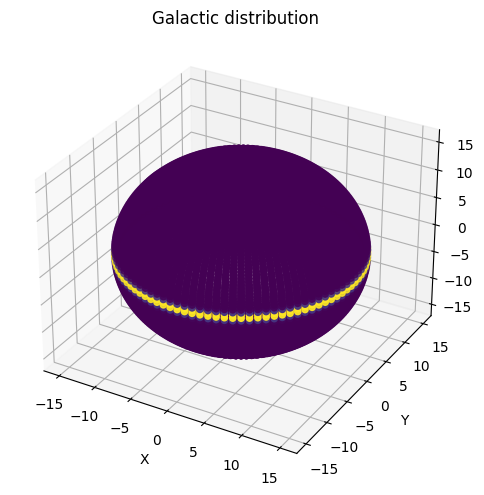

In [4]:
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=Pos_cart(X,Y,Z))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.title('Galactic distribution')

In [26]:
alpha=0.25
Rb=0.8
Rd=2.5
Zd=0.4

Dist_Sun=7.2
            
    
def tf_gal_to_ecl(X,Y,Z):
    Xgct=[]
    Xec=[]
    Yec=[]
    Zec=[]
    
    Xgct = X-Dist_Sun
            
    Xec.append(-0.05487556043*Xgct + 0.4941094278*Y - 0.86766614920*Z)
    Yec.append(-0.99382137890*Xgct - 0.1109907351*Y - 0.00035159077*Z)
    Zec.append(-0.09647662818*Xgct + 0.8622858751*Y + 0.49714719180*Z)
    
    return np.array([Xec]),np.array([Yec]),np.array([Zec])

    

In [27]:
N=100
tab_l_rad=np.linspace(-np.pi,np.pi,N) 
tab_b_rad=np.linspace(-np.pi/2,np.pi/2,N)


Text(0.5, 0.92, 'Ecliptic Distribution')

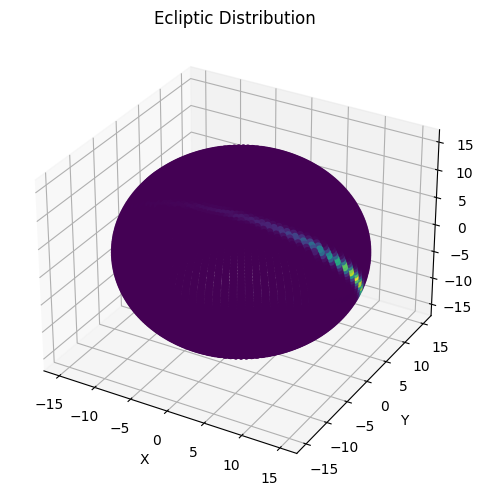

In [25]:
X=np.zeros(10000)
Y=np.zeros(10000)
Z=np.zeros(10000)

X,Y,Z=Cart_coord(tab_l_rad,tab_b_rad)

X_ec,Y_ec,Z_ec=tf_gal_to_ecl(X,Y,Z)

ax = plt.axes(projection='3d') 
ax.scatter(X, Y, Z, c=Pos_cart(X_ec,Y_ec,Z_ec))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.title('Ecliptic Distribution')


In [33]:
def gal_to_ecl(lon_ecl, lat_ecl):
    
    '''
    Transforms ecliptic coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection.
    '''
    
    gal = SkyCoord(lon_ecl*u.rad, lat_ecl*u.rad, frame='galactic',distance=15)
    ecl = gal.transform_to('barycentricmeanecliptic')

    # Minus appears because of “mapping from the inside” issue
    l_ecl, b_ecl = -ecl.lon.wrap_at('180d').radian, ecl.lat.radian
    
    return l_ecl, b_ecl

def eclsp_to_eclpcart(lon_ecl, lat_ecl):
    
    ecl_cart=SkyCoord(lon_ecl*u.rad, lat_ecl*u.rad, frame='barycentricmeanecliptic',distance=15).cartesian
    X,Y,Z=pd.Series((np.array([ecl_cart.x]),np.array([ecl_cart.y]),np.array([ecl_cart.z])))
    
    return X,Y,Z


In [34]:
long_ec,lat_ec=gal_to_ecl(tab_l_rad,tab_b_rad)
print(eclsp_to_eclpcart(long_ec, lat_ec))

(array([[ 13.0149913 ,  13.01958806,  12.98106632,  12.89955679,
         12.77550443,  12.60966464,  12.40309685,  12.15715538,
         11.87347763,  11.5539699 ,  11.20079078,  10.81633234,
         10.40319928,   9.96418621,   9.50225333,   9.0205006 ,
          8.52214078,   8.01047152,   7.48884667,   6.96064721,
          6.42925202,   5.89800863,   5.37020446,   4.84903849,
          4.33759396,   3.83881207,   3.35546702,   2.89014267,
          2.44521094,   2.02281219,   1.62483773,   1.25291463,
          0.90839299,   0.59233575,   0.30551112,   0.04838775,
         -0.1788674 ,  -0.37638835,  -0.54460675,  -0.68424564,
         -0.79631073,  -0.88207895,  -0.9430846 ,  -0.98110313,
         -0.99813269,  -0.99637372,  -0.97820663,  -0.94616783,
         -0.90292444,  -0.85124769,  -0.79398542,  -0.73403395,
         -0.6743094 ,  -0.61771892,  -0.56713198,  -0.52535198,
         -0.49508855,  -0.47893061,  -0.47932066,  -0.49853027,
         -0.53863728,  -0.60150467,  -0

In [43]:
def Coord_eclp_cart(long, lat):
   
    P=[]
    Cd=[]
    X=[]
    Y=[]
    Z=[]
    
    #coord_gal=equatorial_to_galactic(long,lat)
    #tab_l_rad,tab_b_rad=coord_gal[0],coord_gal[1]
    
    
    for l in long:
        for b in lat:
            
            coord_gal=SkyCoord(l*u.rad, b*u.rad,frame="barycentricmeanecliptic",distance=R_Gal)
            #gc_icrs = coord_gal.transform_to('icrs')
            #gc_l_rad,gc_b_rad=gc_icrs.ra.radian,gc_icrs.dec.radian
            #coord_gal=SkyCoord(gc_l_rad*u.rad, gc_b_rad*u.rad,frame="icrs")
            coord_galc=coord_gal.cartesian
            xgc,ygc,zgc=pd.Series(np.array([(coord_galc.x),(coord_galc.y),(coord_galc.z)]))
            c = SkyCoord(x=xgc, y=ygc, z=zgc, representation_type='cartesian')
            C=pd.Series(np.array([(c.x),(c.y),(c.z)]))
            
            X.append(C[0])
            Y.append(C[1])
            Z.append(C[2])
            
    return np.array([X]),np.array([Y]),np.array([Z])


Text(0.5, 0.92, 'Ecliptic Distribution')

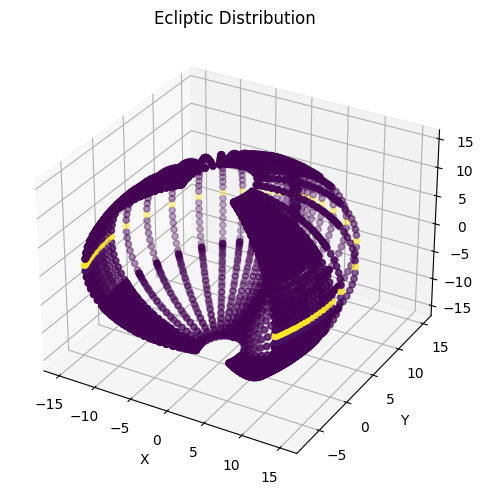

In [44]:
X=np.zeros(10000)
Y=np.zeros(10000)
Z=np.zeros(10000)

long_ec,lat_ec=gal_to_ecl(tab_l_rad,tab_b_rad)
X_ec,Y_ec,Z_ec=Coord_eclp_cart(long_ec,lat_ec)
ax = plt.axes(projection='3d') 
ax.scatter(X_ec, Y_ec, Z_ec, c=Pos_cart(X_ec,Y_ec,Z_ec))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.title('Ecliptic Distribution')


In [52]:
def Cart_coord_bis(long, lat):
   
    P=[]
    Cd=[]
    X=[]
    Y=[]
    Z=[]
    
    #coord_gal=equatorial_to_galactic(long,lat)
    #tab_l_rad,tab_b_rad=coord_gal[0],coord_gal[1]
    
    
    for l in long:
        for b in lat:
            
            coord_gal=SkyCoord(l*u.rad, b*u.rad,frame="galactic",distance=15)
            coord_ec = coord_gal.transform_to('barycentricmeanecliptic')
            ec_l_rad,ec_b_rad=coord_ec.lon.radian,coord_ec.lat.radian
            coord_ecliptic=coord_ec.cartesian
            xec,yec,zec=pd.Series(np.array([(coord_ecliptic.x),(coord_ecliptic.y),(coord_ecliptic.z)]))
            c = SkyCoord(x=xec, y=yec, z=zec, representation_type='cartesian')
            C=pd.Series(np.array([(c.x),(c.y),(c.z)]))
            
            X.append(C[0])
            Y.append(C[1])
            Z.append(C[2])
            
    return np.array([X]),np.array([Y]),np.array([Z])
            

Text(0.5, 0.92, 'Ecliptic Distribution')

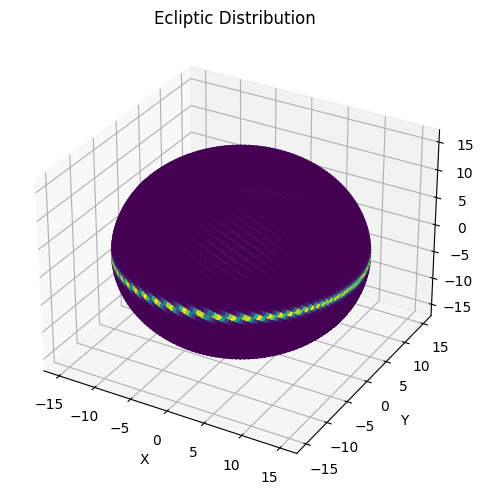

In [53]:
X=np.zeros(10000)
Y=np.zeros(10000)
Z=np.zeros(10000)

#X,Y,Z=Cart_coord(tab_l_rad,tab_b_rad)

X_ec,Y_ec,Z_ec=Cart_coord_bis(tab_l_rad,tab_b_rad)

ax = plt.axes(projection='3d') 
ax.scatter(X_ec, Y_ec, Z_ec, c=Pos_cart(X_ec,Y_ec,Z_ec))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.title('Ecliptic Distribution')